## Problem Statement :

A Chinese automobile company `Geely Auto` aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:



* Which variables are significant in predicting the price of a car.
* How well those variables describe the price of a car.


## Business Goal :



We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Multiple Linear Regression
### Step 1: Reading and Understanding the Data

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 75)


import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  
%matplotlib inline


# Importing RFE and LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
car_master= pd.read_csv("CarPrice_Assignment.csv")
car_master.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [3]:
car_master.shape

(205, 26)

In [4]:
car_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
##As for analysis Car_id value is not significant so we are drop the columns
car_master= car_master.drop('car_ID', axis=1)

In [6]:
# Extracting Car Company from the CarName as per direction in Problem 
car_master['CarName'] = car_master['CarName'].str.split(' ',expand=True)

In [7]:
car_master['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**Typing mistake in Car Company name**

maxda = mazda
Nissan = nissan
porsche = porcshce
toyota = toyouta
vokswagen = volkswagen = vw

In [8]:
# Renaming the typo errors in Car Company names
car_master['CarName'] = car_master['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [9]:
# as per data dictionary symboling column is categorail column so changing the datatype of this columns
car_master['symboling'] = car_master['symboling'].astype(str)

In [10]:
car_master.head(3)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [11]:
car_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg     

In [12]:
car_master.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
#checking for duplicate row
car_master.loc[car_master.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [14]:
#create database Numerical and Categorical Variables/Columns and create two dataframe
categorical_col = car_master.select_dtypes(include=['object']).columns
numerical_col = car_master.select_dtypes(exclude=['object']).columns
cat_df = car_master[categorical_col]
num_df = car_master[numerical_col]

In [15]:
num_df.shape

(205, 14)

In [16]:
cat_df.shape

(205, 11)

In [17]:
cat_df.columns.unique()

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

### Step 2: Visualising  and Cleaning the Data


#### Visualising Numeric Variables

Let us draw a pairplot of all the numeric variables

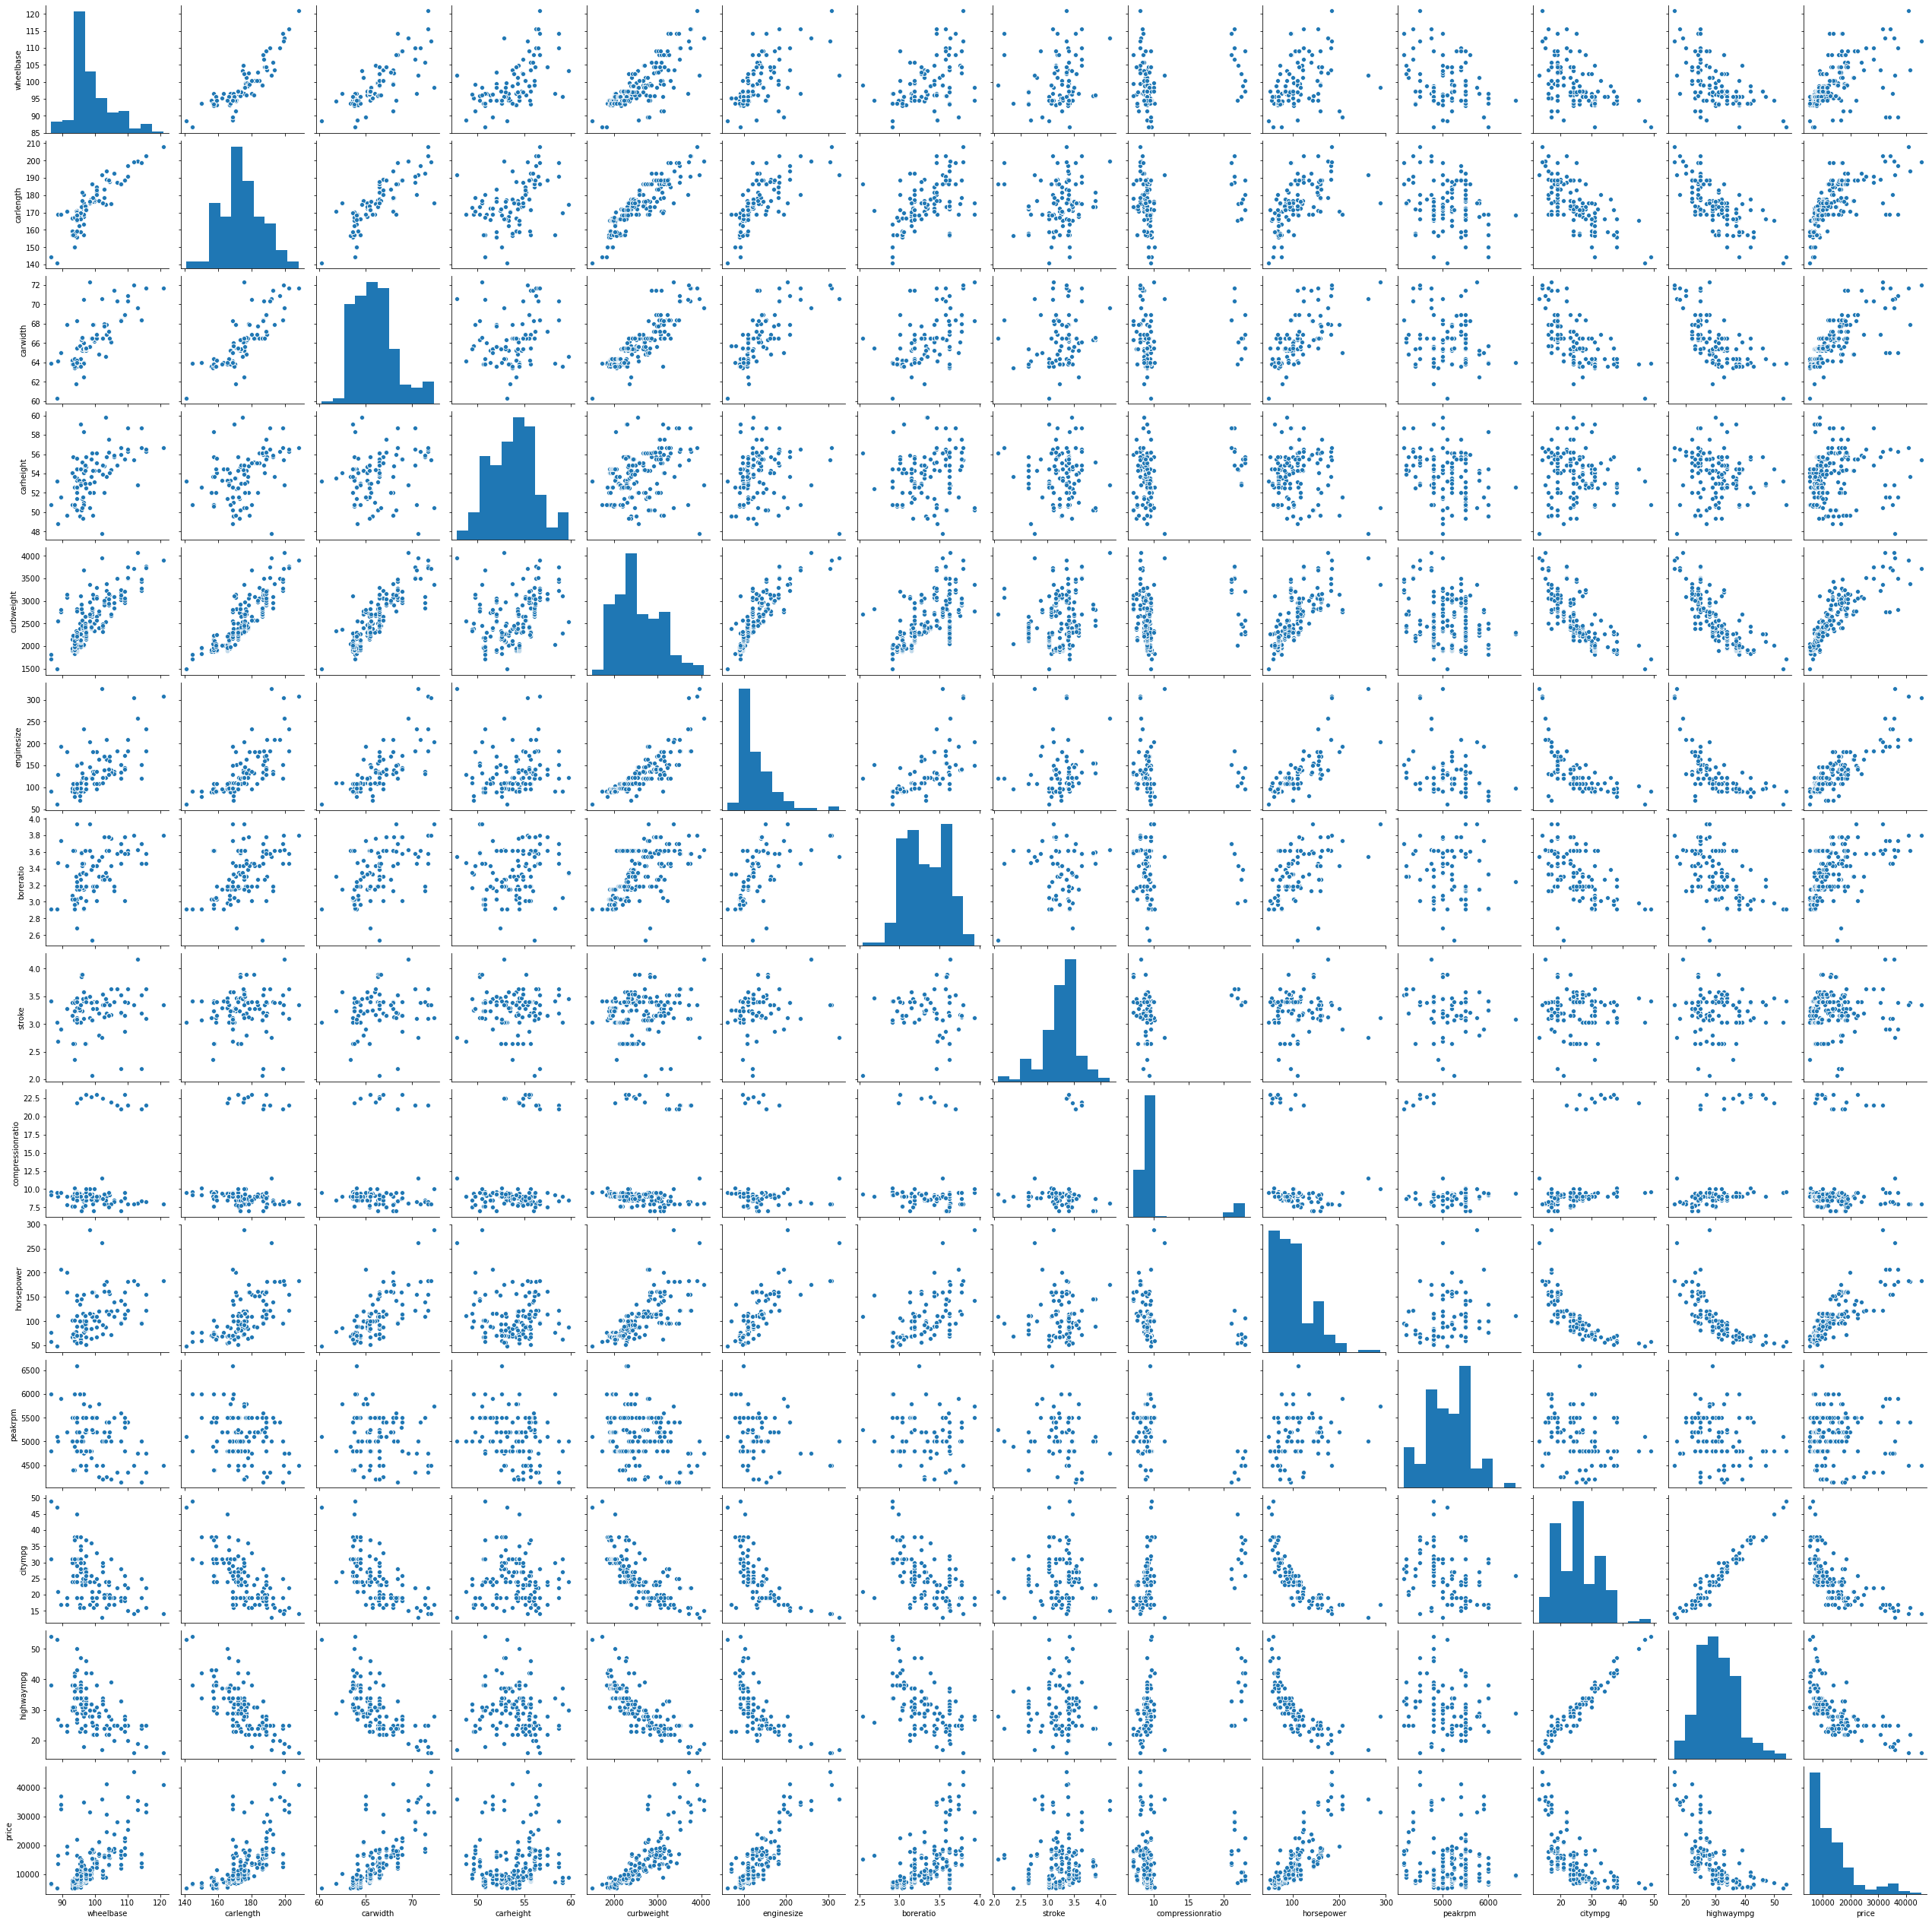

In [18]:
sns.pairplot(num_df)
plt.show()

#### Visualising Categorical Variables

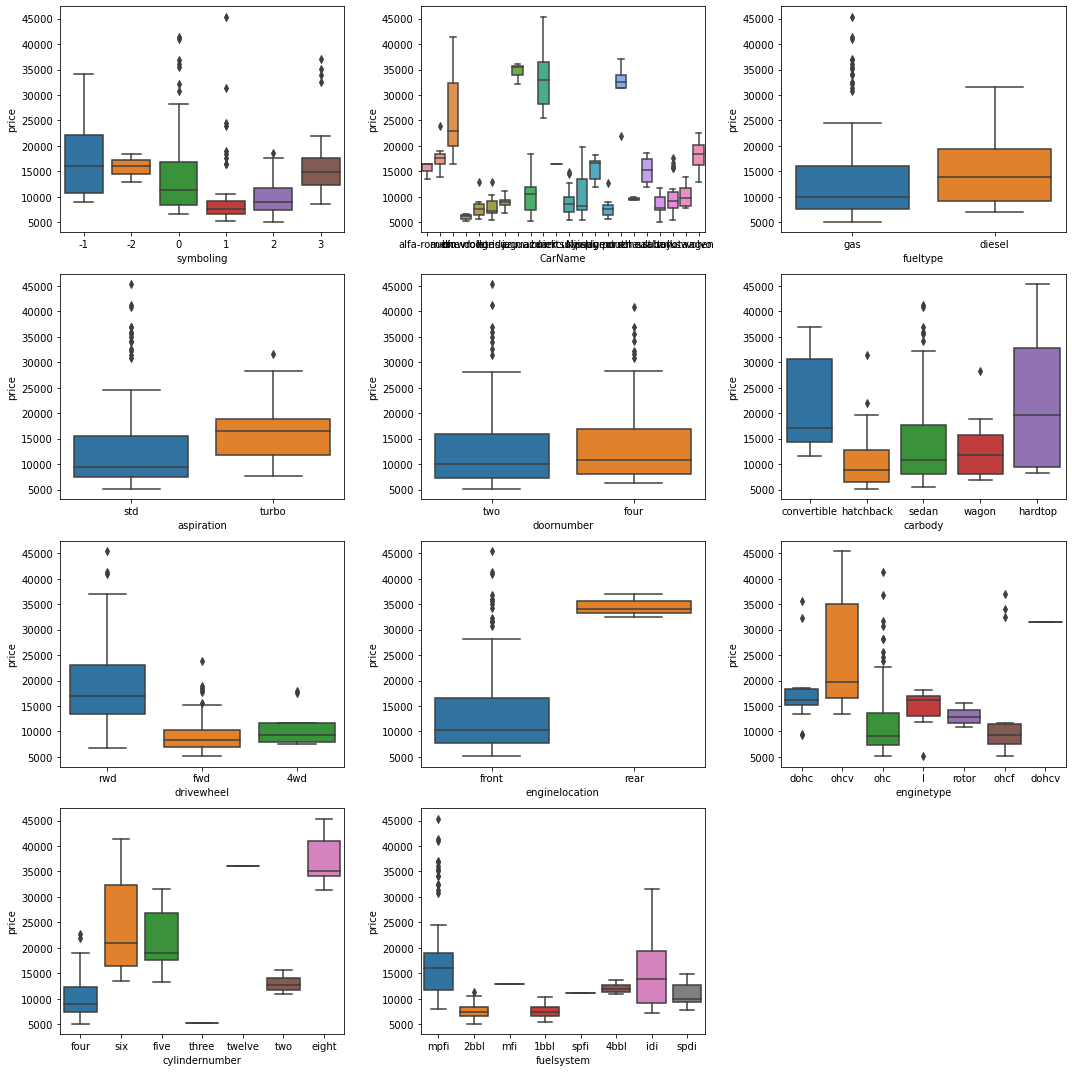

In [19]:
plt.figure(figsize=(15, 15))
def plot_box(df,x_variable):
    for idx, val in enumerate(x_variable, start=1):
        plt.subplot(4,3,idx)
        sns.boxplot(x = val, y = 'price', data = df)
    plt.tight_layout()    
    plt.show()

plot_box(car_master,x_variable=['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'])

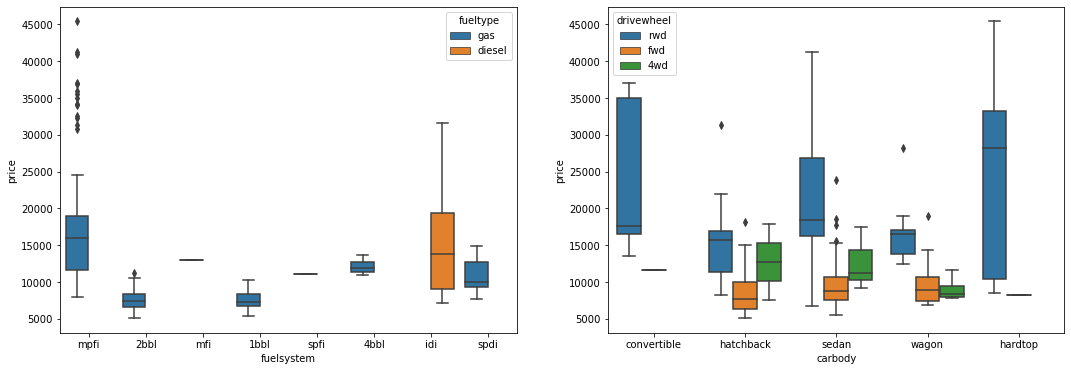

In [20]:
plt.figure(figsize = (18 ,6))
plt.subplot(1,2,1)
sns.boxplot(x = 'fuelsystem', y = 'price', hue = ('fueltype'), data = car_master)
plt.subplot(1,2,2)
sns.boxplot(x = 'carbody', y = 'price', hue = ('drivewheel'), data = car_master)
plt.show()

#### Significant variables after Visualization
- Cars_Category , Engine Type, Fuel Type
- Car Body , Aspiration , Cylinder Number 
- Drivewheel , Curbweight , Car Length 
- Car Length , Car width , Engine Size
- Boreratio , Horse Power , Wheel base 
- citympg , highwaympg , symboling

### Step 3: Data Preparation

In [21]:
sig_cat_col = ['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation',
               'enginetype', 'cylindernumber', 'fuelsystem']

In [22]:
# Get the dummy variables for the categorical feature.
dummies = pd.get_dummies(car_master[sig_cat_col])
dummies.shape

(205, 66)

In [23]:
dummies = pd.get_dummies(car_master[sig_cat_col], drop_first = True)
dummies.shape

(205, 55)

In [24]:
# Add the results to the car_master dataframe
car_master = pd.concat([car_master, dummies], axis = 1)
pd.set_option('display.max_columns', 75)

In [25]:
car_master.tail(3)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,...,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
204,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [26]:
# Drop the original cat variables as dummies are already created
car_master.drop(sig_cat_col, axis = 1, inplace = True)
car_master.shape

(205, 69)

In [27]:
car_master.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


### Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [28]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_master, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
df_test.shape

(62, 69)

### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 


This time, we will use MinMax scaling.

In [30]:
scaler = MinMaxScaler()

In [31]:
sig_num_col =['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
              'compressionratio', 'horsepower','peakrpm', 'citympg', 'highwaympg', 'price']

In [32]:
# Apply scaler() to all the columns except the 'dummy' variables
df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])

In [33]:
df_train.shape

(143, 69)

In [34]:
df_train.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.55102,0.500000,0.567568,0.068818,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.55102,0.166667,0.270270,0.466890,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.00000,0.361111,0.324324,0.122110,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


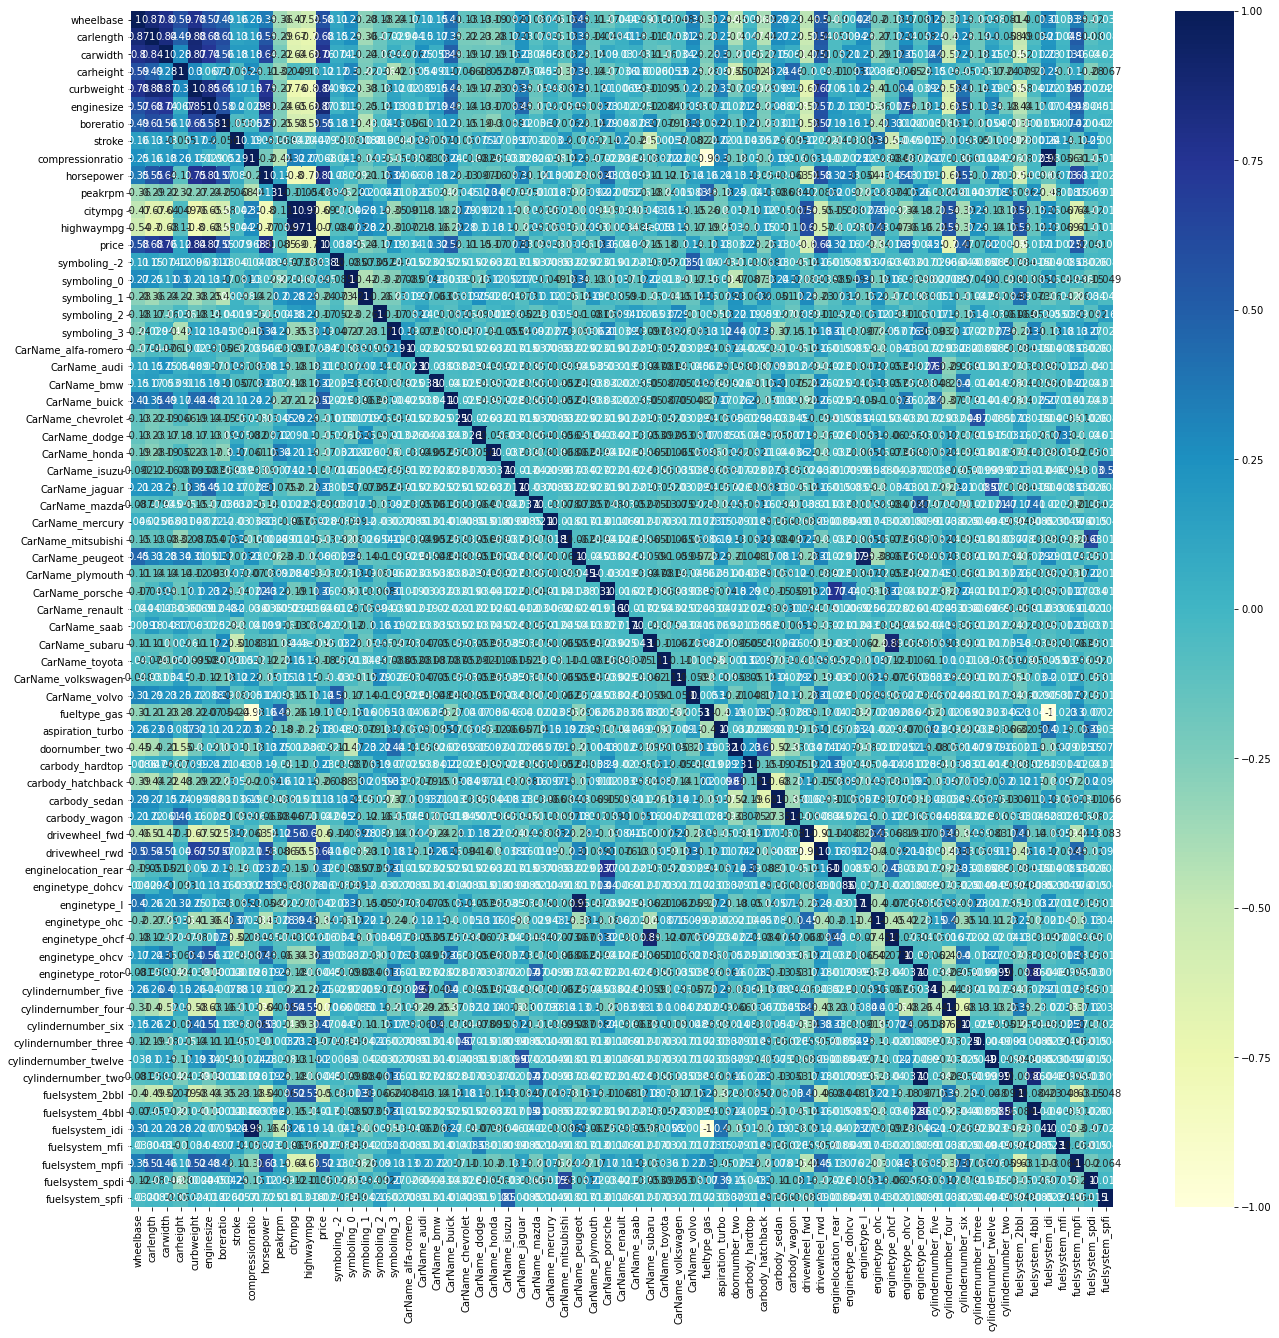

In [35]:
# Let us check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (22, 22))
sns.heatmap(car_master.corr(), cmap="YlGnBu",annot= True)
plt.show()

Let us view on scatterplot for few correlated variables  vs `price`.

---

#### Dividing into X and Y sets for the model building

In [36]:
df_train.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.55102,0.500000,0.567568,0.068818,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.55102,0.166667,0.270270,0.466890,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.00000,0.361111,0.324324,0.122110,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [37]:
df_train.shape

(143, 69)

In [38]:
y_train = df_train.pop('price')
X_train = df_train
X_train.shape

(143, 68)

In [39]:
df_test.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,95.7,166.3,64.4,53.0,2094,98,3.19,3.03,9.0,70,4800,38,47,7738.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
186,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,85,5250,27,34,8495.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
59,98.8,177.8,66.5,53.7,2385,122,3.39,3.39,8.6,84,4800,26,32,8845.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


### Step 5: Building a Linear Model

###   RFE
Let us use Recursive feature elimination since we have too many independent variab

In [40]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [41]:
# running RFE
rfe = RFE(lm, 10)             
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 34),
 ('carlength', False, 33),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 23),
 ('peakrpm', False, 17),
 ('citympg', False, 37),
 ('highwaympg', False, 30),
 ('symboling_-2', False, 8),
 ('symboling_0', False, 47),
 ('symboling_1', False, 45),
 ('symboling_2', False, 46),
 ('symboling_3', False, 42),
 ('CarName_alfa-romero', False, 43),
 ('CarName_audi', False, 22),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 16),
 ('CarName_chevrolet', False, 32),
 ('CarName_dodge', False, 20),
 ('CarName_honda', False, 19),
 ('CarName_isuzu', False, 48),
 ('CarName_jaguar', False, 29),
 ('CarName_mazda', False, 56),
 ('CarName_mercury', False, 57),
 ('CarName_mitsubishi', False, 12),
 ('CarName_peugeot', False, 6),
 ('CarName_plymouth', False, 18),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 

In [43]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'CarName_bmw',
       'CarName_porsche', 'enginelocation_rear', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling_-2',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'CarName_alfa-romero', 'CarName_audi', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_peugeot', 'CarName_plymouth',
       'CarName_renault', 'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'fu

---

In [45]:
# Creating X_train dataframe with RFE selected variables and Let us see the summary of our linear model
X_train_rfe_1 = X_train[col]
X_train_lm_1 = sm.add_constant(X_train_rfe_1)
lm_1 = sm.OLS(y_train,X_train_lm_1).fit()   
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.21e-64
Time:                        22:59:25   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [46]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,41.06
0,carwidth,25.19
2,enginesize,24.95
3,boreratio,9.78
5,CarName_porsche,1.67
6,enginelocation_rear,1.61
8,cylindernumber_twelve,1.50
9,cylindernumber_two,1.27
4,CarName_bmw,1.18
7,cylindernumber_three,1.01


**Dropping the variable and updating the model**

---
**Let us drop `cylindernumber_twelve` beacuse it's `p-value` is `0.511` and we want p-value less than 0.05 and hence rebuilding the model**

In [47]:
X_train_rfe_2 = X_train_rfe_1.drop(["cylindernumber_twelve"], axis = 1)

In [48]:
X_train_lm_2 = sm.add_constant(X_train_rfe_2)
# Running the linear model
lm_2 = sm.OLS(y_train,X_train_lm_2).fit()   
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.18e-65
Time:                        22:59:26   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1587 

In [49]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,38.41
0,carwidth,24.99
2,enginesize,17.70
3,boreratio,9.70
5,CarName_porsche,1.66
6,enginelocation_rear,1.60
8,cylindernumber_two,1.21
4,CarName_bmw,1.14
7,cylindernumber_three,1.01


---
**Let us drop `curbweight` beacuse VTF value is `38.41` and we want VTF less than 5 and therefore rebuilding the model.**

In [50]:
X_train_rfe_3 = X_train_rfe_2.drop(["curbweight"], axis = 1)

In [51]:
X_train_lm_3 = sm.add_constant(X_train_rfe_3)
lm_3 = sm.OLS(y_train,X_train_lm_3).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.01e-63
Time:                        22:59:26   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1778 

In [52]:
vif = pd.DataFrame()
X = X_train_rfe_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,16.48
1,enginesize,10.03
2,boreratio,9.35
5,enginelocation_rear,1.60
4,CarName_porsche,1.59
7,cylindernumber_two,1.17
3,CarName_bmw,1.14
6,cylindernumber_three,1.01


---
**Let us drop `carwidth` beacuse VTF value is `16.48` and we want VTF less than 5 and therefore rebuilding the model.**

In [53]:
X_train_rfe_4 = X_train_rfe_3.drop(["carwidth"], axis = 1)

In [54]:
X_train_lm_4 = sm.add_constant(X_train_rfe_4)
lm_4 = sm.OLS(y_train,X_train_lm_4).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.68e-51
Time:                        22:59:26   Log-Likelihood:                 149.21
No. Observations:                 143   AIC:                            -282.4
Df Residuals:                     135   BIC:                            -258.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0912 

In [55]:
vif = pd.DataFrame()
X = X_train_rfe_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,boreratio,5.49
0,enginesize,5.47
3,CarName_porsche,1.59
4,enginelocation_rear,1.51
2,CarName_bmw,1.10
6,cylindernumber_two,1.10
5,cylindernumber_three,1.00


---

**Let us drop `boreratio` beacuse VTF value is `5.49` and we want VTF less than 5 and therefore rebuilding the model.**

In [56]:
X_train_rfe_5 = X_train_rfe_4.drop(["boreratio"], axis = 1)

In [57]:
X_train_lm_5 = sm.add_constant(X_train_rfe_5)
# Running the linear model
lm_5 = sm.OLS(y_train,X_train_lm_5).fit()   
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     121.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.57e-52
Time:                        22:59:27   Log-Likelihood:                 149.08
No. Observations:                 143   AIC:                            -284.2
Df Residuals:                     136   BIC:                            -263.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0843 

In [58]:
vif = pd.DataFrame()
X = X_train_rfe_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,CarName_porsche,1.56
3,enginelocation_rear,1.50
0,enginesize,1.16
1,CarName_bmw,1.10
4,cylindernumber_three,1.00
5,cylindernumber_two,1.00


**The VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using model `lm_5` and `lm_3`.**

###  MODEL I
- With `lm_5` which has basically 6 predictor variables.

### Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [59]:
y_train_price = lm_5.predict(X_train_lm_5)

Text(0.5, 0, 'Errors')

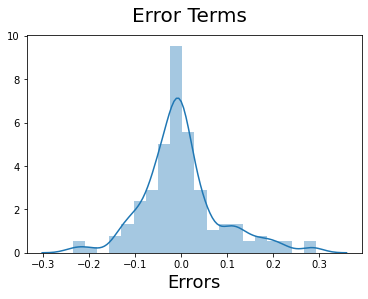

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Step 8: Making Predictions

In [61]:
sig_num_col =['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']



In [62]:
df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 69)

#### Dividing into X_test and y_test


In [63]:
y_test = df_test.pop('price')
X_test = df_test


In [64]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_lm_5.columns]

In [65]:
# Making predictions using the final model
y_pred = lm_5.predict(X_test_new)

### Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

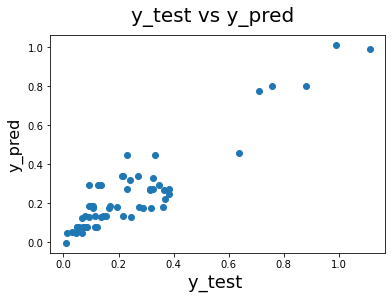

In [66]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

### RMSE Score

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8559773795402239

**The R2 score of Training set is 0.855 and Test set is 0.855 which is quite close.
Hence, We can say that our model is good enough to predict the Car prices using below predictor variables**


* enginesize               
* CarName_bmw              	
* CarName_porsche          
* enginelocation_rear      
* cylindernumber_three     
* cylindernumber_two                         
        

#### Equation of Line to predict the Car prices values

$ Carprice = -0.0843 +  1.1724  \times  enginesize + 0.2047  \times  CarNamebmw +  0.1676 \times CarNameporsche  + 0.1270 \times enginelocationrear  + 0.0852 \times cylindernumberThree - 0.2517 \times ccylindernumberTwo $

#### Model I Conclusions:
- R-sqaured and Adjusted R-squared - 0.842 and 0.836 .
- F-stats and Prob(F-stats) (overall model fit) 121.2 and 1.57e-70(approx. 0.0) - Model fit is significant.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

----
----

### MODEL II
- With `lm_3` which has basically 8 predictor variables.

### Step 7: Residual Analysis of the train data

In [68]:
y_train_price = lm_3.predict(X_train_lm_3)

Text(0.5, 0, 'Errors')

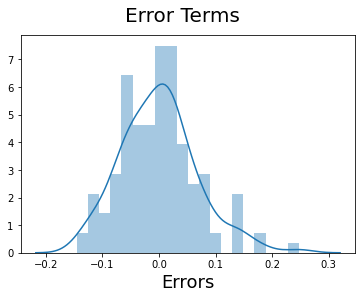

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### Step 8: Making Predictions

In [70]:
X_test_new = X_test_1[X_train_lm_3.columns]

In [71]:

# Making predictions using the final model
y_pred = lm_3.predict(X_test_new)

### Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.


##### Plotting y_test and y_pred to understand the spread.


Text(0, 0.5, 'y_pred')

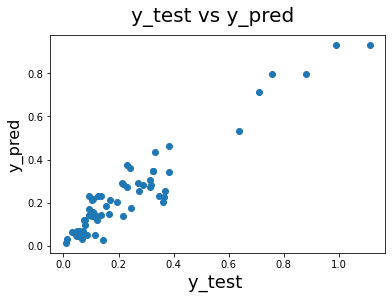

In [72]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    


### RMSE Score

In [73]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.9037558420336881

**The R2 score of Training set is 0.903 and Test set is 0.903 which is quite close.
Hence, We can say that our model is good enough to predict the Car prices using below predictor variables**


* carwidth                
* enginesize               
* boreratio               
* CarName_bmw              
* CarName_porsche          
* enginelocation_rear      
* cylindernumber_three     
* cylindernumber_two    

#### Equation of Line to predict the Car prices values


$ Carprice = -0.1778 +  0.4952  \times  carwidth + 0.7451  \times  enginesize - 0.0657 \times boreratio  + 0.2499 \times CarNameBmw  + 0.1012 \times CarNamePorsche + 0.3627 \times enginelocationRear +0.1907\times cylindernumberThree +0.1748\times  cylindernumberTwo $

#### Model II Conclusions:
- R-sqaured and Adjusted R-squared - 0.901 and 0.895 .
- F-stats and Prob(F-stats) (overall model fit) 152.5 and 2.01e-63(approx. 0.0) - Model fit is significant.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.